In [1]:
import cv2
from IPython.display import Image
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm_notebook

Using TensorFlow backend.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'train', 'train.csv', 'sample_submission.csv']


In [3]:
train_dir="../input/train/train"
test_dir=r"../input/test/test"
train=pd.read_csv('../input/train.csv')
df_test=pd.read_csv('../input/sample_submission.csv')

In [4]:
train.head(5)

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [5]:
train.has_cactus=train.has_cactus.astype(str)

In [6]:
train.shape[0],train.shape[1]

(17500, 2)

In [7]:
train['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

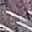

In [8]:
Image(os.path.join(train_dir,train.iloc[1,0]),width=250,height=250)

In [9]:
datagen=ImageDataGenerator(rescale=1./255)
batch_size=150

In [10]:
train_generator=datagen.flow_from_dataframe(dataframe=train[:15001],directory=train_dir,x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                            target_size=(150,150))


validation_generator=datagen.flow_from_dataframe(dataframe=train[15000:],directory=train_dir,x_col='id',
                                                y_col='has_cactus',class_mode='binary',batch_size=50,
                                                target_size=(150,150))

Found 15001 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [11]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
# model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [15]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.rmsprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
metrics=['acc'])
# model.compile(loss='binary_crossentropy',optimizer=optimizers.adam(),metrics=['acc'])
# model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#               ,metrics=['acc'])


In [16]:
epochs=10
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=epochs,
                            validation_data=validation_generator,validation_steps=50)

Epoch 1/10
100/100 [==============================] - 25s 250ms/step - loss: 0.1718 - acc: 0.9347 - val_loss: 0.3851 - val_acc: 0.8404
Epoch 2/10
100/100 [==============================] - 21s 215ms/step - loss: 0.1220 - acc: 0.9521 - val_loss: 0.0670 - val_acc: 0.9756
Epoch 3/10
100/100 [==============================] - 25s 249ms/step - loss: 0.1014 - acc: 0.9593 - val_loss: 0.1044 - val_acc: 0.9632
Epoch 4/10
100/100 [==============================] - 21s 213ms/step - loss: 0.0775 - acc: 0.9696 - val_loss: 0.0762 - val_acc: 0.9708
Epoch 5/10
100/100 [==============================] - 23s 233ms/step - loss: 0.0723 - acc: 0.9733 - val_loss: 0.1002 - val_acc: 0.9684
Epoch 6/10
100/100 [==============================] - 23s 227ms/step - loss: 0.0610 - acc: 0.9795 - val_loss: 0.0871 - val_acc: 0.9828
Epoch 7/10
100/100 [==============================] - 23s 227ms/step - loss: 0.0527 - acc: 0.9815 - val_loss: 0.0955 - val_acc: 0.9720
Epoch 8/10
100/100 [==============================] - 2

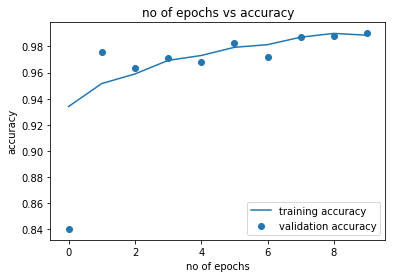

In [17]:
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,epochs)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

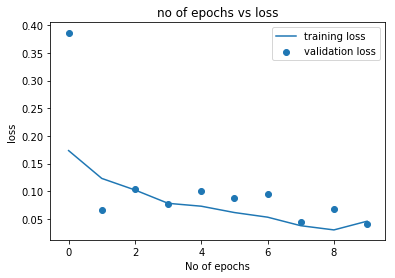

In [18]:
acc=history.history['loss']    ##getting  loss of each epochs
epochs_=range(0,epochs)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()

In [19]:
test_generetor = ImageDataGenerator(rescale = 1./255)

In [20]:
test_gen = test_generetor.flow_from_directory(directory=r"../input/test",target_size=(150,150),
                                    color_mode="rgb",batch_size=1,class_mode=None,shuffle=False,seed=42)

Found 4000 images belonging to 1 classes.


In [21]:
test_features = []
Test_images = []
for img_id in tqdm_notebook(os.listdir(test_dir)):
    test_features.append(cv2.resize(cv2.imread(os.path.join(test_dir,img_id)),(150,150)))     
    Test_images.append(img_id)
test_features = np.asarray(test_features)
test_features = test_features.astype('float32')
test_features /= 255

In [22]:
test_features.shape

(4000, 150, 150, 3)

In [23]:
test_predictions = model.predict(test_features)
submissions = pd.DataFrame(test_predictions, columns=['has_cactus'])
submissions['has_cactus'] = submissions['has_cactus'].apply(lambda x: 1 if x > 0.75 else 0)
submissions['id'] = ''
cols = submissions.columns.tolist()
cols = cols[-1:] + cols[:-1]
submissions=submissions[cols]

# STEP_SIZE_TEST=test_gen.n//test_gen.batch_size
# test_gen.reset()
# pred=model.predict_generator(test_gen,
# steps=STEP_SIZE_TEST,
# verbose=1)

In [24]:
submissions.head()

,id,has_cactus
0,,0
1,,0
2,,1
3,,0
4,,0


In [25]:
for i, img in enumerate(Test_images):
    submissions.set_value(i,'id',img)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [26]:
submissions.head()

,id,has_cactus
0,c662bde123f0f83b3caae0ffda237a93.jpg,0
1,9553eed7793d4cf88b5226d446d93dae.jpg,0
2,19f059a7ce41b25be1548bc4049b45ec.jpg,1
3,fb4f464486f4894330273346ce939252.jpg,0
4,b52558a522db6ec2501ae188b6d6e526.jpg,0


In [27]:
submissions.to_csv('submission.csv',index=False)